In [1]:
import pandas as pd

# Load the dataset to inspect its structure and contents
file_path = "C:/Users/ankit/OneDrive/Desktop/Loan Default Prediction/LoanDefault_Updated.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             242580 non-null  float64
 2   Income          245133 non-null  float64
 3   LoanAmount      245133 non-null  float64
 4   CreditScore     242580 non-null  float64
 5   MonthsEmployed  242580 non-null  float64
 6   NumCreditLines  242580 non-null  float64
 7   InterestRate    242580 non-null  float64
 8   LoanTerm        242580 non-null  float64
 9   DTIRatio        242580 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

(None,
        LoanID   Age   Income  LoanAmount  CreditScore  MonthsEmployed  \
 0  I38PQUQS96  56.0  85994.0     50587.0        520.0            80.0   
 1  HPSK72WA7R  69.0  50432.0    124440.0        458.0            15.0   
 2  C1OZ6DPJ8Y  46.0  84208.0    129188.0        451.0            26.0   
 3  V2KKSFM3UN  32.0  31713.0     44799.0        743.0             0.0   
 4  EY08JDHTZP  60.0  20437.0      9139.0        633.0             8.0   
 
    NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
 0             4.0         15.23      36.0      0.44   Bachelor's   
 1             1.0          4.81      60.0      0.68     Master's   
 2             3.0         21.17      24.0      0.31     Master's   
 3             3.0          7.07      24.0      0.23  High School   
 4             4.0          6.51      48.0      0.73   Bachelor's   
 
   EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
 0      Full-time      Divorced         Yes           Yes 

In [3]:
# Calculate the percentage of missing values for each column
missing_data = df.isnull().mean() * 100

# Display columns with missing values and their percentages
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_data

Age               4.999863
CreditScore       4.999863
MonthsEmployed    4.999863
NumCreditLines    4.999863
InterestRate      4.999863
LoanTerm          4.999863
DTIRatio          4.999863
Default           4.999863
Income            4.000047
LoanAmount        4.000047
dtype: float64

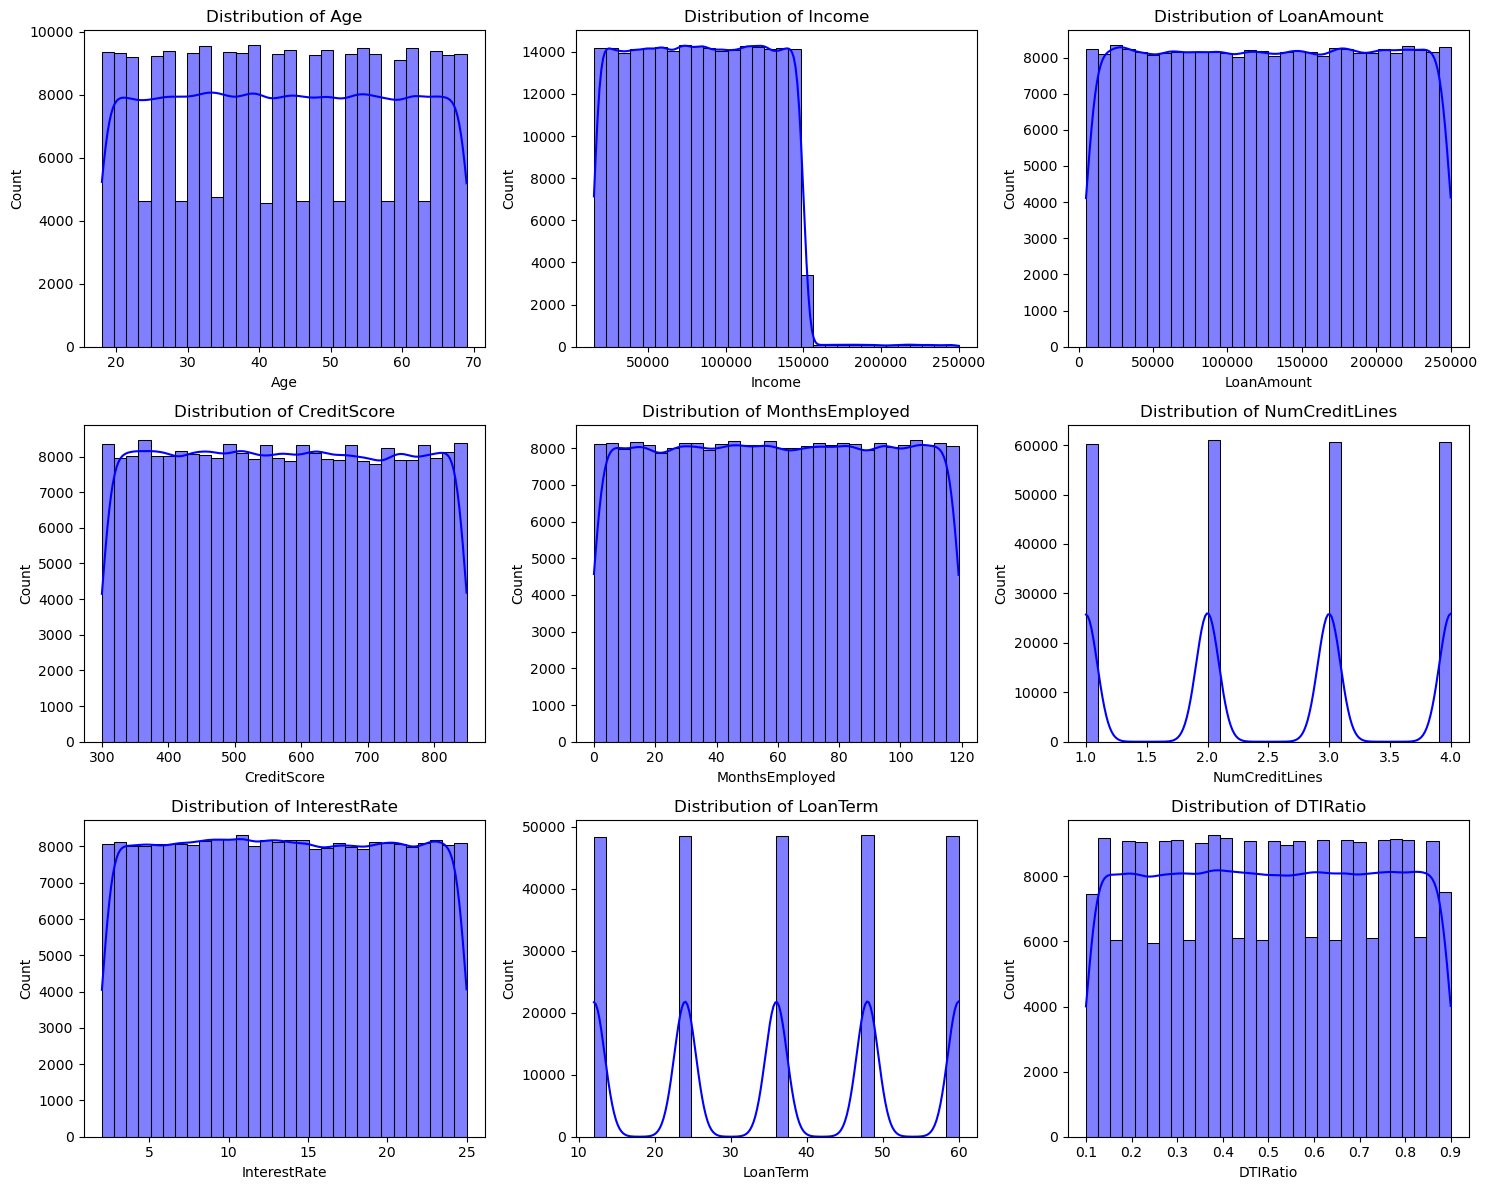

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of numerical columns with missing values
numerical_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
                  'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='blue', bins=30)
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [7]:
# Impute missing values based on the observed distributions
from sklearn.impute import SimpleImputer

# Define imputers
median_imputer = SimpleImputer(strategy='median')
mean_imputer = SimpleImputer(strategy='mean')

# Apply imputers to relevant columns
df['LoanAmount'] = median_imputer.fit_transform(df[['LoanAmount']])
df['Income'] = median_imputer.fit_transform(df[['Income']])
df['InterestRate'] = median_imputer.fit_transform(df[['InterestRate']])
df['CreditScore'] = mean_imputer.fit_transform(df[['CreditScore']])
df['Age'] = mean_imputer.fit_transform(df[['Age']])
df['MonthsEmployed'] = median_imputer.fit_transform(df[['MonthsEmployed']])
df['NumCreditLines'] = median_imputer.fit_transform(df[['NumCreditLines']])
df['LoanTerm'] = median_imputer.fit_transform(df[['LoanTerm']])
df['DTIRatio'] = median_imputer.fit_transform(df[['DTIRatio']])

# Handle missing values in the 'Default' column by imputing mode (most frequent)
df['Default'] = df['Default'].fillna(df['Default'].mode()[0])

# Verify if missing values are handled
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [9]:
# Export the cleaned dataset
cleaned_file_path = "C:/Users/ankit/OneDrive/Desktop/Loan Default Prediction/LoanDefault_Cleaned.csv"
df.to_csv(cleaned_file_path, index=False)
cleaned_file_path

'C:/Users/ankit/OneDrive/Desktop/my_projects/loan prediction/LoanDefault_Cleaned.csv'

In [13]:
import sqlite3
import pandas as pd

file_path = "C:/Users/ankit/OneDrive/Desktop/Loan Default Prediction/LoanDefault_Cleaned.csv"
loan = pd.read_csv(file_path)
conn = sqlite3.connect('loan_default_model.db')
cursor = conn.cursor()
cursor.execute('''
CREATE TABLE IF NOT EXISTS LoanPurpose (
    LoanPurposeID INTEGER PRIMARY KEY AUTOINCREMENT,
    LoanPurpose TEXT NOT NULL
)
''')
cursor.execute('''
CREATE TABLE IF NOT EXISTS LoanDetails (
    LoanID TEXT PRIMARY KEY,
    LoanAmount INTEGER,
    CreditScore INTEGER,
    InterestRate REAL,
    LoanTerm INTEGER,
    DTIRatio REAL,
    LoanPurposeID INTEGER,
    FOREIGN KEY (LoanPurposeID) REFERENCES LoanPurpose (LoanPurposeID)
)
''')
cursor.execute('''
CREATE TABLE IF NOT EXISTS BorrowerDetails (
    LoanID TEXT PRIMARY KEY,
    Age INTEGER,
    Income INTEGER,
    MonthsEmployed INTEGER,
    NumCreditLines INTEGER,
    Education TEXT,
    EmploymentType TEXT,
    MaritalStatus TEXT,
    FOREIGN KEY (LoanID) REFERENCES LoanDetails (LoanID)
)
''')
cursor.execute('''
CREATE TABLE IF NOT EXISTS Dependents (
    LoanID TEXT PRIMARY KEY,
    HasDependents TEXT,
    FOREIGN KEY (LoanID) REFERENCES BorrowerDetails (LoanID)
)
''')
cursor.execute('''
CREATE TABLE IF NOT EXISTS Mortgage (
    LoanID TEXT PRIMARY KEY,
    HasMortgage TEXT,
    FOREIGN KEY (LoanID) REFERENCES BorrowerDetails (LoanID)
)
''')
cursor.execute('''
CREATE TABLE IF NOT EXISTS CoSigner (
    LoanID TEXT PRIMARY KEY,
    HasCoSigner TEXT,
    FOREIGN KEY (LoanID) REFERENCES BorrowerDetails (LoanID)
)
''')
cursor.execute('''
CREATE TABLE IF NOT EXISTS LoanDefault (
    LoanID TEXT PRIMARY KEY,
    [Default] INTEGER,
    FOREIGN KEY (LoanID) REFERENCES LoanDetails (LoanID)
)
''')
loan_purpose_columns = ['LoanPurpose']
loan_purpose_data = loan[loan_purpose_columns].drop_duplicates()
loan_purpose_data.to_sql('LoanPurpose', conn, if_exists='replace', index=False)
#loan_details_columns = ['LoanID','LoanAmount','CreditScore','InterestRate','LoanTerm','DTIRatio','LoanPurposeID']
#loan_details_data = loan[loan_details_columns].drop_duplicates()

###########
# Map LoanPurpose to ID
loan_purpose_map = pd.read_sql("SELECT * FROM LoanPurpose", conn)
loan = loan.merge(loan_purpose_map, on="LoanPurpose", how="left")
############

loan_details_columns = ['LoanID', 'LoanAmount', 'CreditScore', 'InterestRate', 'LoanTerm', 'DTIRatio', 'LoanPurposeID']
existing_columns = [col for col in loan_details_columns if col in loan.columns]
loan_details_data = loan[existing_columns].drop_duplicates()


loan_details_data.to_sql('LoanDetails',conn, if_exists='replace',index=False)
borrower_details_columns = ['LoanID','Age','Income','MonthsEmployed','NumCreditLines' ,'Education','EmploymentType','MaritalStatus']
existing_columns = [col for col in borrower_details_columns if col in loan.columns]
borrower_details_data = loan[existing_columns].drop_duplicates()

borrower_details_data.to_sql('BorrowerDetails', conn, if_exists='replace', index=False)
dependents_columns = ['LoanID', 'HasDependents']
existing_columns = [col for col in dependents_columns if col in loan.columns]
dependents_data = loan[existing_columns].drop_duplicates()

dependents_data.to_sql('Dependents', conn, if_exists='replace', index=False)
mortgage_columns = ['LoanID', 'HasMortgage']
existing_columns = [col for col in mortgage_columns if col in loan.columns]
mortgage_data = loan[existing_columns].drop_duplicates()

mortgage_data.to_sql('Mortgage', conn, if_exists='replace', index=False)
cosigner_columns = ['LoanID', 'HasCoSigner']
existing_columns = [col for col in cosigner_columns if col in loan.columns]
cosigner_data = loan[existing_columns].drop_duplicates()

cosigner_data.to_sql('CoSigner', conn, if_exists='replace', index=False)
loan_default_columns = ['LoanID', '[Default]']
existing_columns = [col for col in loan_default_columns if col in loan.columns]
loan_default_data = loan[existing_columns].drop_duplicates()

loan_default_data.to_sql('LoanDefault', conn, if_exists='replace', index=False)
conn.commit()
conn.close()

In [15]:
import sqlite3
import pandas as pd

# Load the uploaded dataset to explore its structure
file_path = "C:/Users/ankit/OneDrive/Desktop/Loan Default Prediction/LoanDefault_Cleaned.csv"
data = pd.read_csv(file_path)

# Display basic information about the dataset
data.info(), data.head()


# Create a SQLite database in memory
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Load the dataset into the SQLite database
data.to_sql("LoanData", conn, index=False, if_exists="replace")

# Verify the data has been loaded successfully by fetching the first few rows
query = "SELECT * FROM LoanData LIMIT 5;"
pd.read_sql_query(query, conn)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  float64
 2   Income          255347 non-null  float64
 3   LoanAmount      255347 non-null  float64
 4   CreditScore     255347 non-null  float64
 5   MonthsEmployed  255347 non-null  float64
 6   NumCreditLines  255347 non-null  float64
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  float64
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

LoanID   Age   Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96  56.0  85994.0     50587.0        520.0            80.0   
1  HPSK72WA7R  69.0  50432.0    124440.0        458.0            15.0   
2  C1OZ6DPJ8Y  46.0  84208.0    129188.0        451.0            26.0   
3  V2KKSFM3UN  32.0  31713.0     44799.0        743.0             0.0   
4  EY08JDHTZP  60.0  20437.0      9139.0        633.0             8.0   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0             4.0         15.23      36.0      0.44   Bachelor's   
1             1.0          4.81      60.0      0.68     Master's   
2             3.0         21.17      24.0      0.31     Master's   
3             3.0          7.07      24.0      0.23  High School   
4             4.0          6.51      48.0      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   
2     Unemployed      Divorced         Yes           Yes        Auto   
3      Full-time       Married          No            No    Business   
4     Unemployed      Divorced          No           Yes        Auto   

  HasCoSigner  Default  
0         Yes      0.0  
1         Yes      0.0  
2          No      1.0  
3          No      0.0  
4          No      0.0

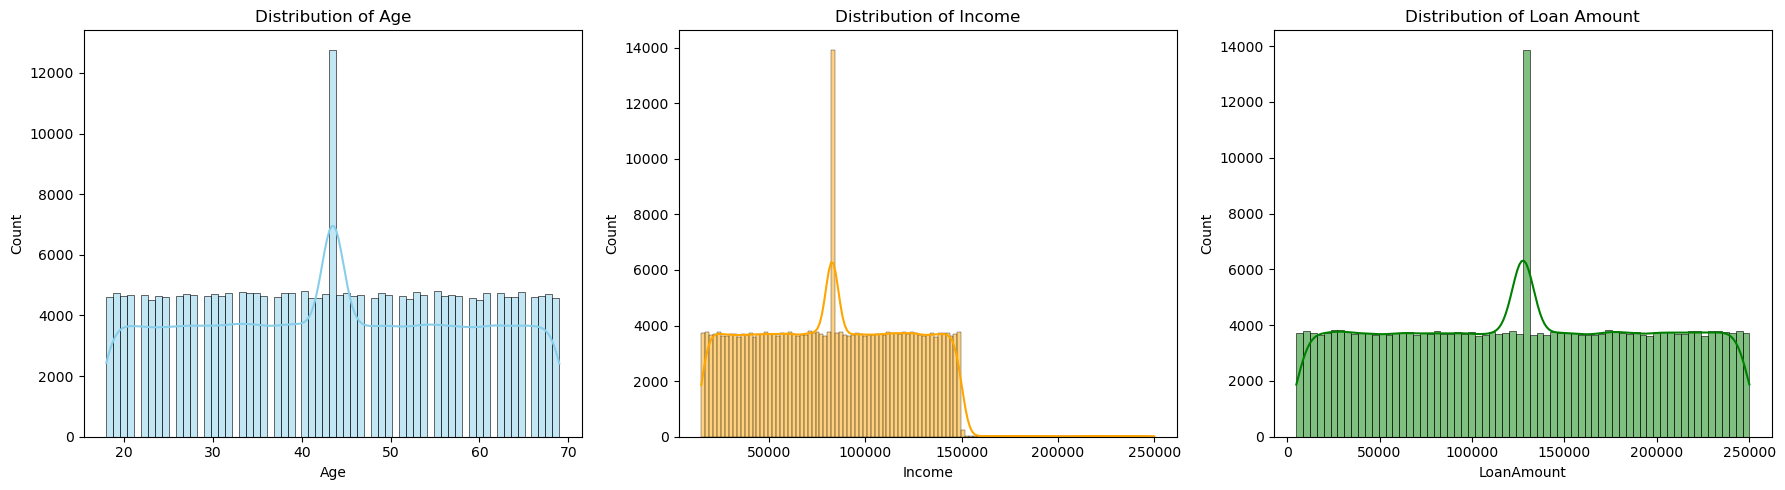

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fixing the SQL query by escaping the reserved column name "Default"
query_univariate_fixed = """
SELECT Age, Income, LoanAmount, CreditScore, InterestRate, DTIRatio, "Default"
FROM LoanData;
"""
univariate_data_fixed = pd.read_sql_query(query_univariate_fixed, conn)

# Univariate Analysis - Distribution of Age, Income, and LoanAmount
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(univariate_data_fixed["Age"], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution of Age")

sns.histplot(univariate_data_fixed["Income"], kde=True, ax=axes[1], color='orange')
axes[1].set_title("Distribution of Income")

sns.histplot(univariate_data_fixed["LoanAmount"], kde=True, ax=axes[2], color='green')
axes[2].set_title("Distribution of Loan Amount")

plt.tight_layout()
plt.show()

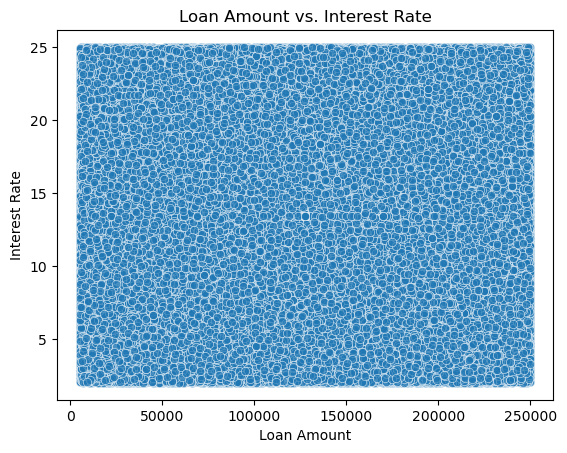

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Replace 'df' with your actual DataFrame name
df = pd.read_csv("C:/Users/ankit/OneDrive/Desktop/Loan Default Prediction/LoanDefault_Cleaned.csv")
sns.scatterplot(data=df, x='LoanAmount', y='InterestRate', alpha=0.7)
plt.title('Loan Amount vs. Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()


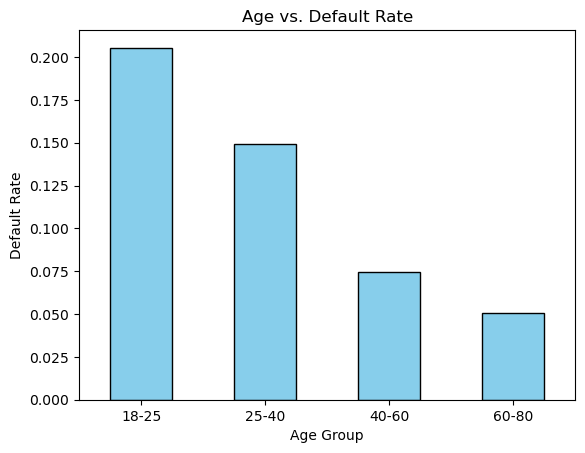

In [23]:
import pandas as pd

# Replace 'df' with your actual DataFrame
# Assuming columns: 'Age' and 'Default' (1 for default, 0 otherwise)
age_bins = [18, 25, 40, 60, 80]
age_labels = ['18-25', '25-40', '40-60', '60-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

#default_rate = df.groupby('AgeGroup')['Default'].mean()
default_rate = df.groupby('AgeGroup', observed=True)['Default'].mean()

default_rate.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Age vs. Default Rate')
plt.xlabel('Age Group')
plt.ylabel('Default Rate')
plt.xticks(rotation=0)
plt.show()

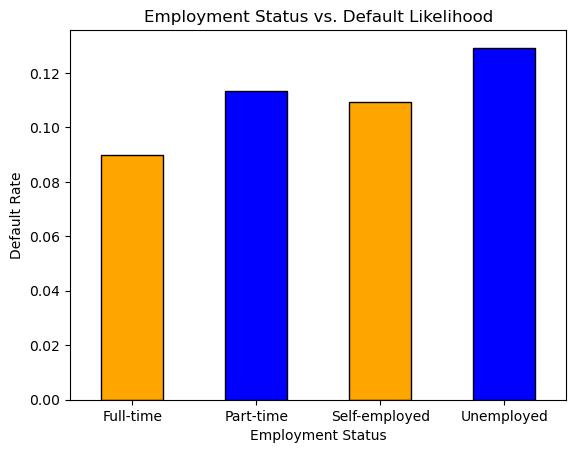

In [25]:
# Assuming columns: 'EmploymentStatus' and 'Default'
default_by_employment = df.groupby('EmploymentType')['Default'].mean()

default_by_employment.plot(kind='bar', color=['orange', 'blue'], edgecolor='black')
plt.title('Employment Status vs. Default Likelihood')
plt.xlabel('Employment Status')
plt.ylabel('Default Rate')
plt.xticks(rotation=0)
plt.show()

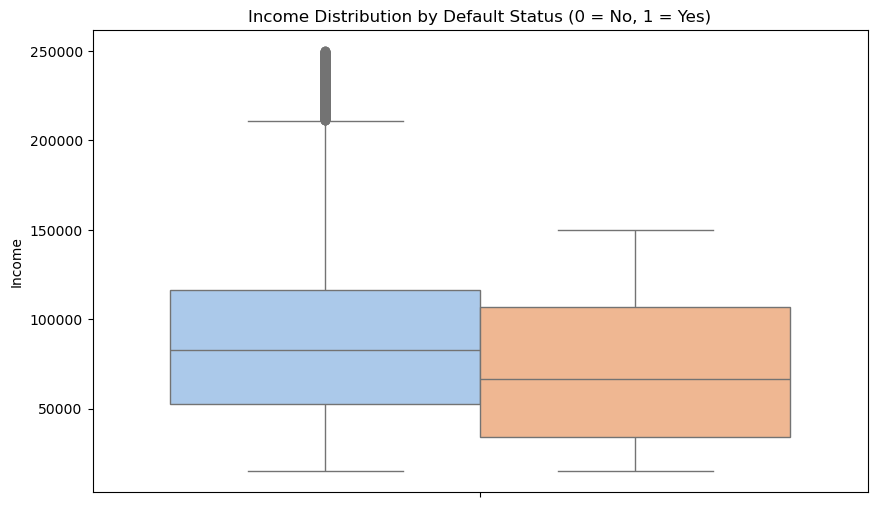

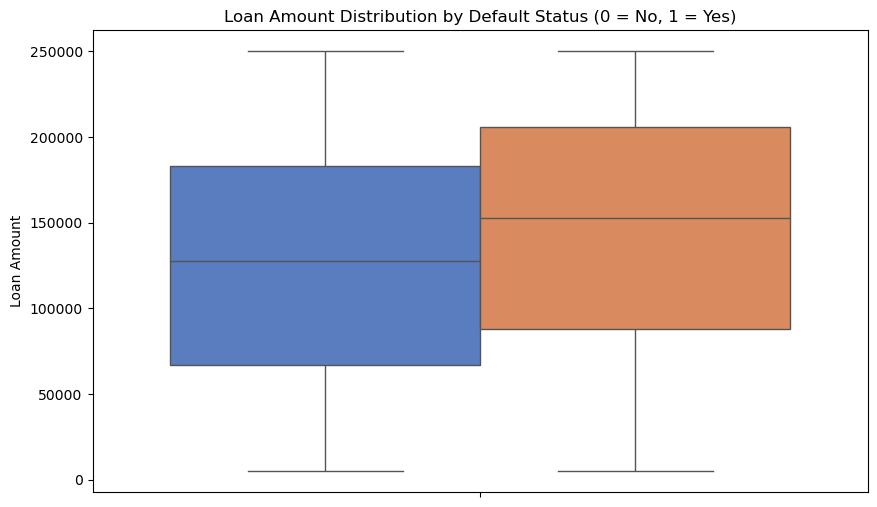

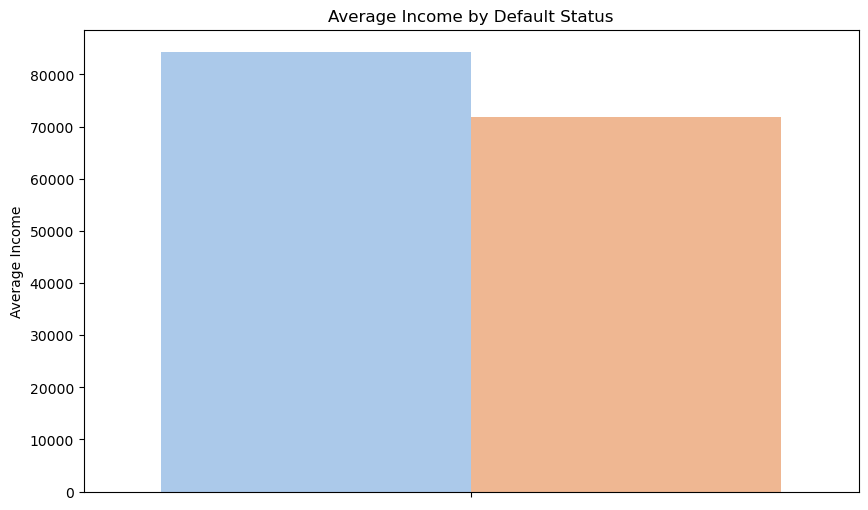

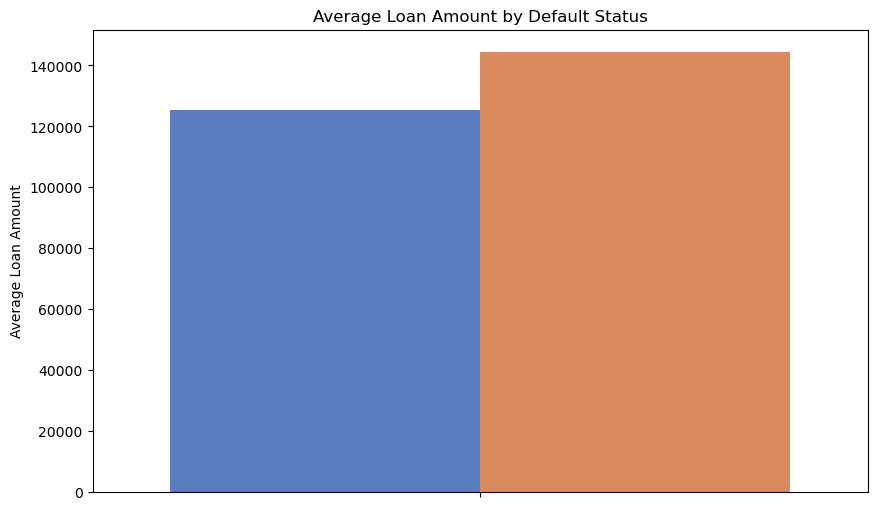

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Query to extract data for Income and Default relationship
query_income = """
SELECT Income, "Default"
FROM LoanData;
"""
income_data = pd.read_sql_query(query_income, conn)

# Query to extract data for LoanAmount and Default relationship
query_loanamount = """
SELECT LoanAmount, "Default"
FROM LoanData;
"""
loanamount_data = pd.read_sql_query(query_loanamount, conn)

# Boxplot for Income and Default
plt.figure(figsize=(10, 6))
sns.boxplot(y="Income", data=income_data, hue="Default", palette="pastel", legend=False)
plt.title("Income Distribution by Default Status (0 = No, 1 = Yes)")
plt.ylabel("Income")
plt.show()

# Boxplot for LoanAmount and Default
plt.figure(figsize=(10, 6))
sns.boxplot(y="LoanAmount", data=loanamount_data, hue="Default", palette="muted", legend=False)
plt.title("Loan Amount Distribution by Default Status (0 = No, 1 = Yes)")
plt.ylabel("Loan Amount")
plt.show()

# Optional: Bar Chart for Average Income and LoanAmount by Default
avg_data_query = """
SELECT "Default", AVG(Income) AS AvgIncome, AVG(LoanAmount) AS AvgLoanAmount
FROM LoanData
GROUP BY "Default";
"""
avg_data = pd.read_sql_query(avg_data_query, conn)

# Barplot: Average Income by Default
plt.figure(figsize=(10, 6))
sns.barplot(y="AvgIncome", data=avg_data, hue="Default", palette="pastel", legend=False)
plt.title("Average Income by Default Status")
plt.ylabel("Average Income")
plt.show()

# Barplot: Average LoanAmount by Default
plt.figure(figsize=(10, 6))
sns.barplot(y="AvgLoanAmount", data=avg_data, hue="Default", palette="muted", legend=False)
plt.title("Average Loan Amount by Default Status")
plt.ylabel("Average Loan Amount")
plt.show()


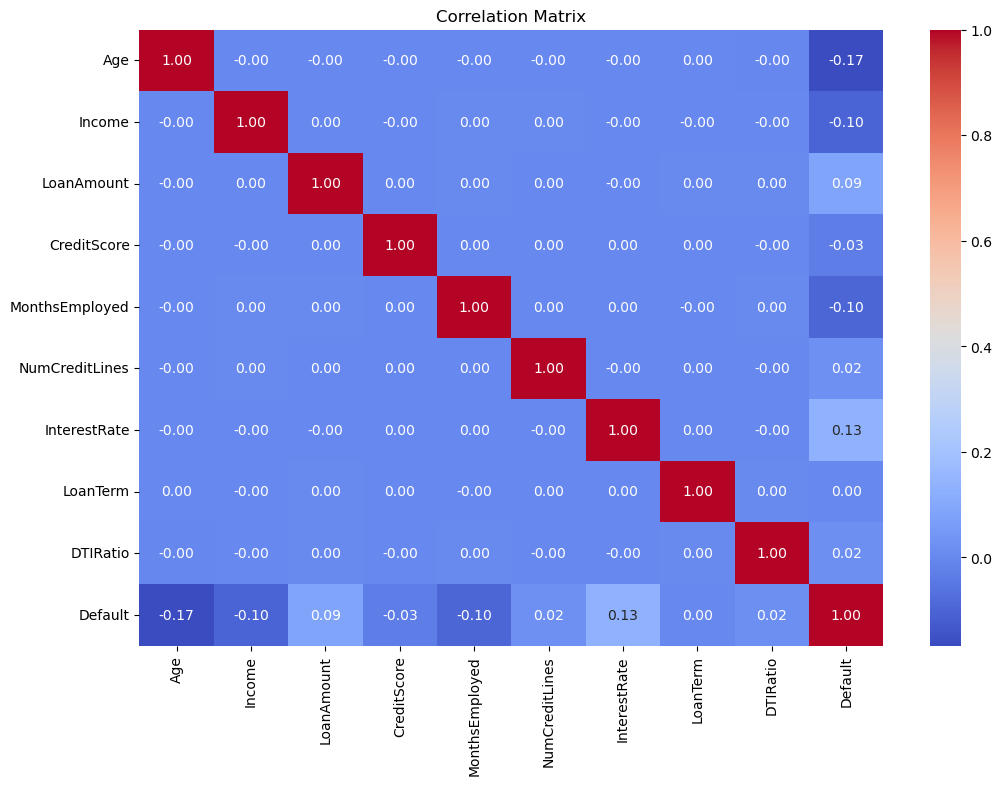

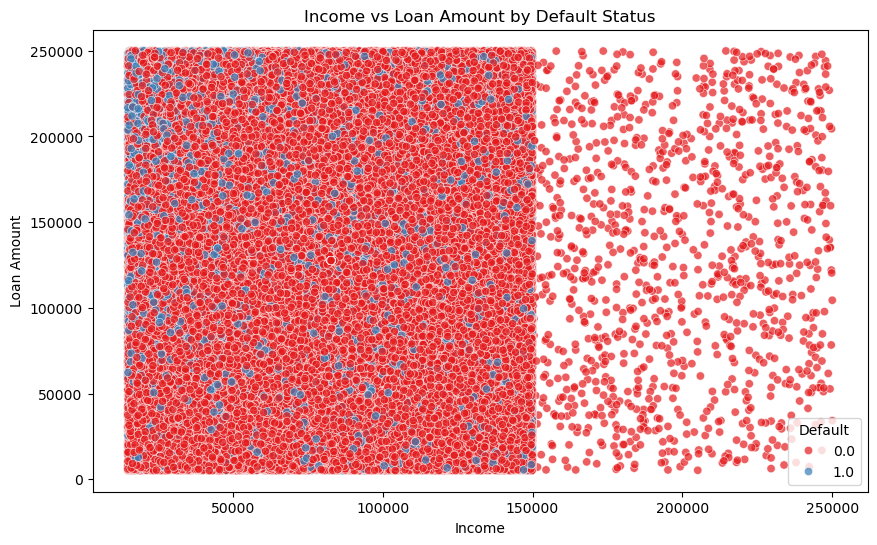

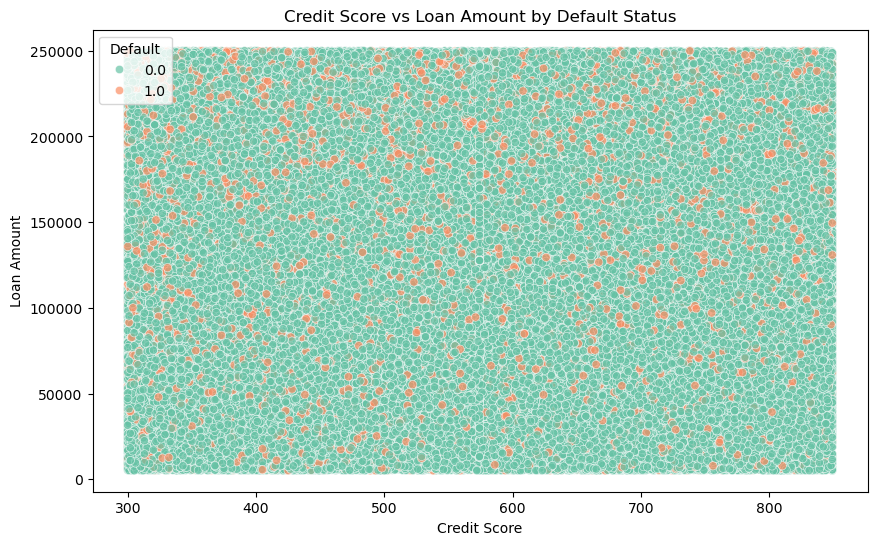

In [35]:
# Query to fetch numerical columns for correlation analysis
query_correlation = """
SELECT Age, Income, LoanAmount, CreditScore, MonthsEmployed, NumCreditLines, 
       InterestRate, LoanTerm, DTIRatio, "Default"
FROM LoanData;
"""
correlation_data = pd.read_sql_query(query_correlation, conn)

# Compute correlation matrix
corr_matrix = correlation_data.corr()

# Plot the heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

# Key Feature Combinations: Scatter Plot (e.g., Income vs. LoanAmount colored by Default)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Income", y="LoanAmount", hue="Default", data=correlation_data, palette="Set1", alpha=0.7
)
plt.title("Income vs Loan Amount by Default Status")
plt.xlabel("Income")
plt.ylabel("Loan Amount")
plt.show()

# Scatter Plot for CreditScore vs LoanAmount colored by Default
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="CreditScore", y="LoanAmount", hue="Default", data=correlation_data, palette="Set2", alpha=0.7
)
plt.title("Credit Score vs Loan Amount by Default Status")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.show()


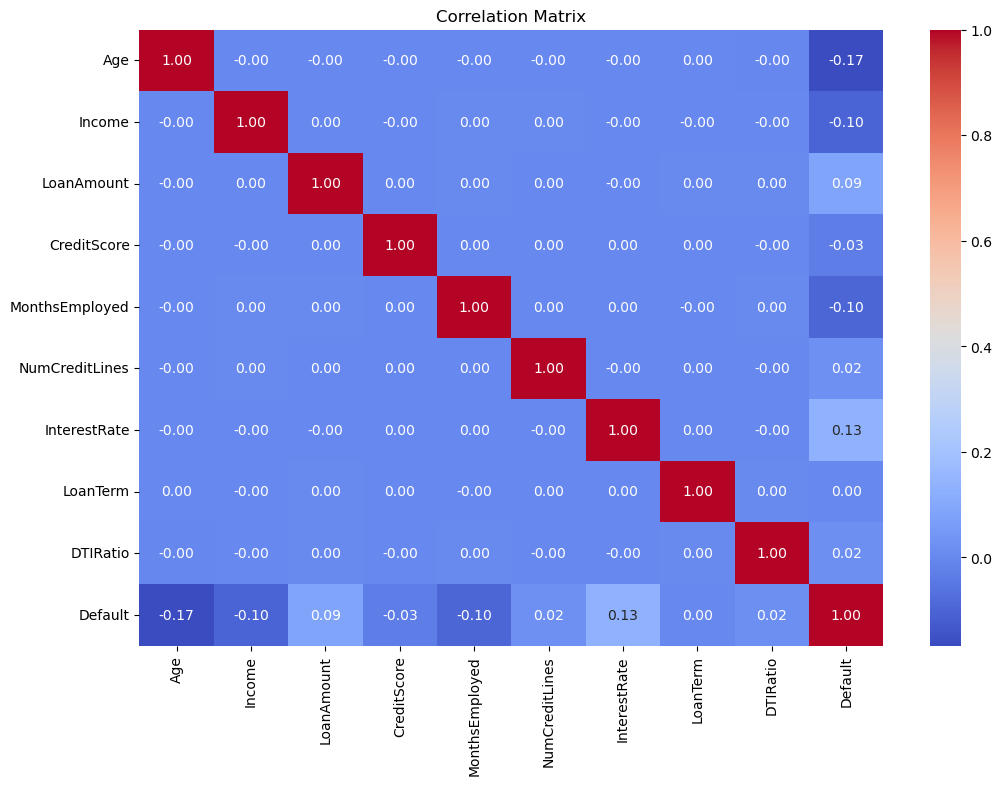

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("C:/Users/ankit/OneDrive/Desktop/Loan Default Prediction/LoanDefault_Cleaned.csv")

# Select only numerical columns for correlation
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                     'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default']
correlation_data = data[numerical_columns]

# Compute correlation matrix
corr_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

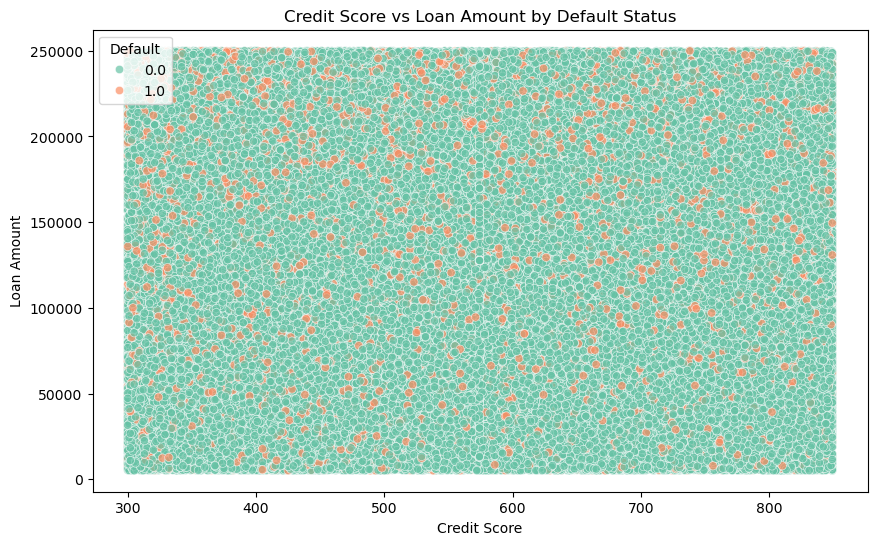

In [39]:
# Scatter plot: Credit Score vs Loan Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="CreditScore", y="LoanAmount", hue="Default", data=data, palette="Set2", alpha=0.7
)
plt.title("Credit Score vs Loan Amount by Default Status")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.show()

In [45]:
# Load dataset
import pandas as pd
data = pd.read_csv("C:/Users/ankit/OneDrive/Desktop/Loan Default Prediction/LoanDefault_Cleaned.csv")
# Step 1: Check data types of columns
print(data.dtypes)

# Step 2: Exclude non-numeric columns
numerical_columns = data.select_dtypes(include=["float64", "int64"]).columns
print("Numerical Columns:", numerical_columns)

# Step 3: Recalculate variances and correlations
variances = data[numerical_columns].var()

# Calculate correlation coefficients
correlation_matrix = data[numerical_columns].corr()

# Display top correlations with Default
if "Default" in correlation_matrix.columns:
    default_correlations = correlation_matrix["Default"].sort_values(ascending=False)
    print("\nTop Correlations with Default:\n", default_correlations)
else:
    print("Default column not found in correlation matrix.")


# Calculate variance for numerical features
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
                     'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default']
variances = data[numerical_columns].var()

# Calculate correlation coefficients
correlation_matrix = data[numerical_columns].corr()

# Display top correlations with Default
default_correlations = correlation_matrix["Default"].sort_values(ascending=False)

print("Variances of Numerical Features:\n", variances)
print("\nTop Correlations with Default:\n", default_correlations)


LoanID             object
Age               float64
Income            float64
LoanAmount        float64
CreditScore       float64
MonthsEmployed    float64
NumCreditLines    float64
InterestRate      float64
LoanTerm          float64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default           float64
dtype: object
Numerical Columns: Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'],
      dtype='object')

Top Correlations with Default:
 Default           1.000000
InterestRate      0.130667
LoanAmount        0.086045
NumCreditLines    0.020338
DTIRatio          0.018943
LoanTerm          0.000752
CreditScore      -0.033994
MonthsEmployed   -0.096621
Income           -0.101207
Age              -0.167138
Name: Default, dtype: floa

Variances of Numerical Features:
 Age               2.134963e+02
Income            1.510827e+09
LoanAmount        4.820031e+09
CreditScore       2.397833e+04
MonthsEmployed    1.140171e+03
NumCreditLines    1.196810e+00
InterestRate      4.182022e+01
LoanTerm          2.734563e+02
DTIRatio          5.064208e-02
Default           9.827536e-02
dtype: float64

Top Correlations with Default:
 Default           1.000000
InterestRate      0.130667
LoanAmount        0.086045
NumCreditLines    0.020338
DTIRatio          0.018943
LoanTerm          0.000752
CreditScore      -0.033994
MonthsEmployed   -0.096621
Income           -0.101207
Age              -0.167138
Name: Default, dtype: float64


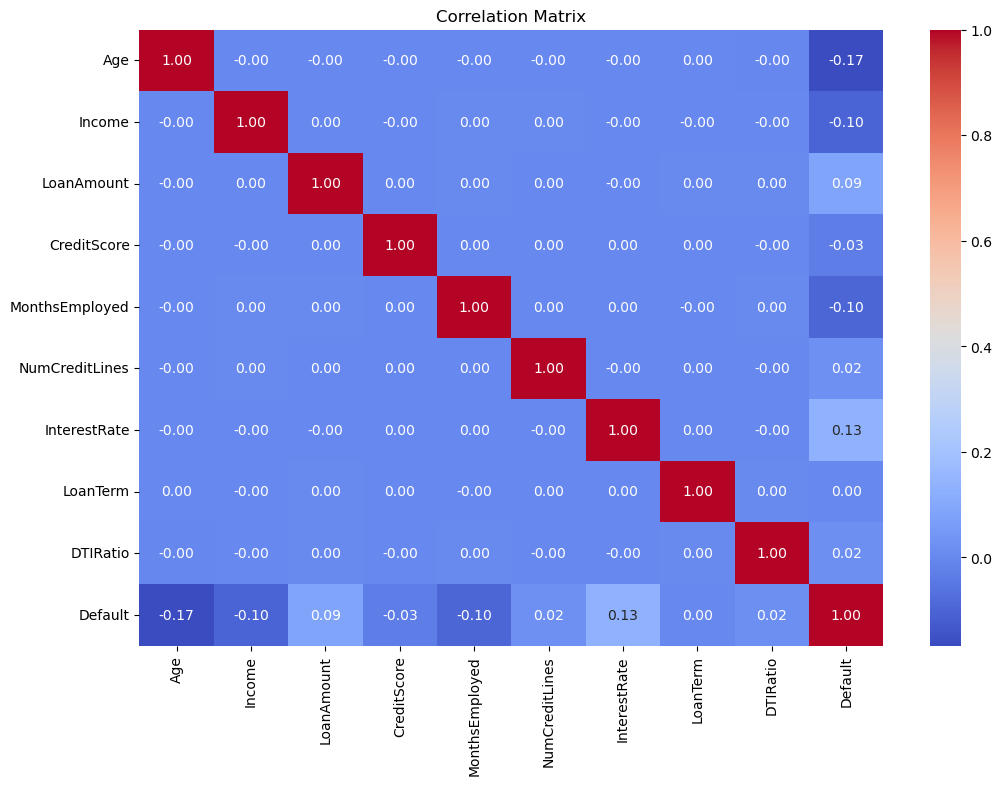

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("C:/Users/ankit/OneDrive/Desktop/Loan Default Prediction/LoanDefault_Cleaned.csv")

# Step 1: Convert all columns with numeric data stored as strings to proper numeric type
for col in data.columns:
    try:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    except Exception as e:
        print(f"Skipping column {col}: {e}")

# Step 2: Drop columns that are entirely non-numeric or have too many missing values
numerical_data = data.select_dtypes(include=["float64", "int64"])
numerical_data = numerical_data.dropna(axis=1, how='any')  # Drop columns with any missing values

# Step 3: Calculate variance for numerical features
variances = numerical_data.var()

# Step 4: Compute correlation matrix
correlation_matrix = numerical_data.corr()

# Step 5: Display results
print("Variances of Numerical Features:\n", variances)

# Top correlations with Default if it exists
if "Default" in correlation_matrix.columns:
    default_correlations = correlation_matrix["Default"].sort_values(ascending=False)
    print("\nTop Correlations with Default:\n", default_correlations)
else:
    print("\n'Default' column not found or non-numeric.")

# Step 6: Plot Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

default_correlations = correlation_matrix["Default"].sort_values(ascending=False)


In [49]:
from scipy.stats import ttest_ind, chi2_contingency
data = pd.read_csv("C:/Users/ankit/OneDrive/Desktop/Loan Default Prediction/LoanDefault_Cleaned.csv")

# Example 1: t-test for Income between Default groups
group1 = data[data['Default'] == 0]['Income']
group2 = data[data['Default'] == 1]['Income']
t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
print(f"T-test: t-statistic = {t_stat}, p-value = {p_val}")

# Example 2: Chi-square test for LoanPurpose and Default
contingency_table = pd.crosstab(data['LoanPurpose'], data['Default'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test: chi2-statistic = {chi2_stat}, p-value = {p_val}")

T-test: t-statistic = 51.40576619863209, p-value = 0.0
Chi-square test: chi2-statistic = 125.06069232907133, p-value = 4.4299306858908986e-26


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Prepare data
features = ['Income', 'LoanAmount', 'CreditScore', 'DTIRatio']
X = data[features].dropna()
y = data['Default'].dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
logreg = LogisticRegression(max_iter=500, class_weight='balanced')
logreg.fit(X_train, y_train)

# Predictions and performance
y_pred = logreg.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.65      0.77     69123
         1.0       0.15      0.58      0.24      7482

    accuracy                           0.65     76605
   macro avg       0.54      0.62      0.51     76605
weighted avg       0.86      0.65      0.72     76605

ROC-AUC Score: 0.6180682313100825


In [55]:
#################
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load dataset
data = pd.read_csv("C:/Users/ankit/OneDrive/Desktop/Loan Default Prediction/LoanDefault_Cleaned.csv")

# Select features and target
features = ['Income', 'LoanAmount', 'CreditScore', 'DTIRatio']
X = data[features].dropna()
y = data['Default'].dropna()

# Align target and features
X = X.loc[y.index]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to handle class imbalance
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.87      0.88     68413
         1.0       0.87      0.90      0.89     67869

    accuracy                           0.88    136282
   macro avg       0.88      0.88      0.88    136282
weighted avg       0.89      0.88      0.88    136282

ROC-AUC Score: 0.8847454606251532


In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Train decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Decision Tree Predictions
y_pred_tree = clf.predict(X_test)

# Confusion Matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Confusion Matrix:\n", conf_matrix_tree)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

# Accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy:", accuracy_tree)

Accuracy: 0.8455628769756828
Confusion Matrix:
 [[56871 11542]
 [ 9505 58364]]
Confusion Matrix:
 [[56871 11542]
 [ 9505 58364]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.83      0.84     68413
         1.0       0.83      0.86      0.85     67869

    accuracy                           0.85    136282
   macro avg       0.85      0.85      0.85    136282
weighted avg       0.85      0.85      0.85    136282

Accuracy: 0.8455628769756828


In [59]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Prepare data for regression
features = ['Income', 'CreditScore', 'DTIRatio', 'MonthsEmployed']
target = 'LoanAmount'
X = data[features].dropna()
y = data[target].dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train gradient boosting model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predictions and performance
y_pred = gbr.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Gradient Boosting Predictions
y_pred_gbr = gbr.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred_gbr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting Performance:\nMSE = {mse:.2f}, RMSE = {rmse:.2f}, R² = {r2:.2f}")


MSE: 4358944730.061996
Gradient Boosting Performance:
MSE = 4358944730.06, RMSE = 66022.30, R² = -0.00


Confusion Matrix:
 [[45193 23930]
 [ 3125  4357]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.65      0.77     69123
         1.0       0.15      0.58      0.24      7482

    accuracy                           0.65     76605
   macro avg       0.54      0.62      0.51     76605
weighted avg       0.86      0.65      0.72     76605

ROC-AUC Score: 0.6262539607086288


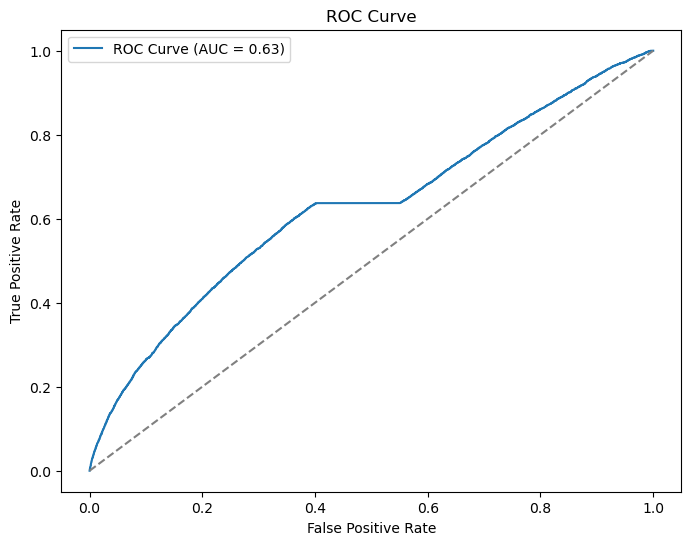

In [73]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define features
features = ['Income', 'LoanAmount', 'CreditScore', 'DTIRatio']

# Drop rows with missing values in selected features and target
data_filtered = data[features + ['Default']].dropna()

# Split the filtered data
X = data_filtered[features]
y = data_filtered['Default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Logistic Regression Predictions
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [77]:
# Define the consistent feature set
features = ['Income', 'LoanAmount', 'CreditScore', 'DTIRatio']  # Ensure features are consistent
target = 'Default'

# Prepare the dataset
X = data[features].dropna()
y = data[target].dropna()

# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=500, class_weight='balanced')
logreg.fit(X_train, y_train)

# Predictions and performance
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("Training class distribution:\n", y_train.value_counts())
print("Testing class distribution:\n", y_test.value_counts())


Confusion Matrix:
 [[45193 23930]
 [ 3125  4357]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.65      0.77     69123
         1.0       0.15      0.58      0.24      7482

    accuracy                           0.65     76605
   macro avg       0.54      0.62      0.51     76605
weighted avg       0.86      0.65      0.72     76605

ROC-AUC Score: 0.6262539607086288
Training class distribution:
 Default
0.0    158013
1.0     20729
Name: count, dtype: int64
Testing class distribution:
 Default
0.0    69123
1.0     7482
Name: count, dtype: int64
